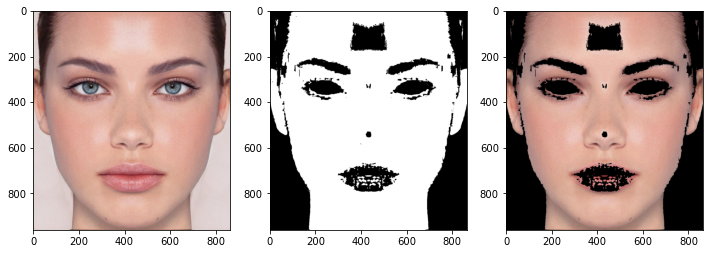

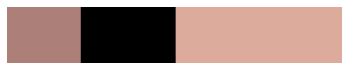

In [25]:
import os
import cv2 
import numpy as np #다차원 배열 "shape"튜플 자료형
from  matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


img_path = "C:/Users/chosuyeon/Desktop/project/face.jpg"
img = cv.imread(img_path)
# bgr을 hsv로 변환한다.
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 피부 상한,하한 값을 지정 한다.
lowerColor = np.array([0,48,80])
upperColor = np.array([20,255,255])

# 특정 범위 안에 있는 행렬 원소 검출
my_mask = cv.inRange(hsv, lowerColor, upperColor)

# 빼고남은것
res = cv.bitwise_and(img,img, mask= my_mask)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv.cvtColor(my_mask, cv.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

# 결과를 파일로 저장
cv2.imwrite("C:/Users/chosuyeon/Desktop/project/colorChart.png", res)




# 클러스터링 알고리즘
# centroid_histogram(clt)는 대표 군집을 히스토그램 형식으로 반환하는 함수
def centroid_histogram(clt):
    # 데이터 시각화하기
    # np.arange(시작점(생략 시 0), 끝점(미포함), step size(생략 시 1)) 
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # .astype('float')는 실수형으로 변경
    hist = hist.astype("float")
    #왼쪽변수에 오른쪽값을 나누고 그결과를 왼쪽변수에 할당한다.
    hist /= hist.sum()

    # 히스토그램에 반환
    return hist

# 화면에 그래프를 그리는 코드
def plot_colors(hist, centroids):
    # 
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # 컬러 퍼센테이지
    # 각각의 클러스터
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    return bar

#가까운 평균을 갖는 클러스터, 클러스터의 평균은 센트로이드
def image_color_cluster(image_path, k = 3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3)) #Reshape을 통하여 행렬의 형태를 변형
    
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    

    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    
image_path = "C:/Users/chosuyeon/Desktop/project/colorChart.png"
image_color_cluster(image_path)

